In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузим данные из файла CSV
file_path = './merged-markup-incognito.csv'
data = pd.read_csv(file_path, encoding='windows-1251', sep=';')

# Выведем первые несколько строк, чтобы понять структуру данных
data.head(3)

,Sentence,Entity,YSPU-1-mark,YSPU-1-reason,YSPU-2-mark,YSPU-2-reason,YSPU-3-mark,YSPU-3-reason,YSPU-4-mark,YSPU-4-reason,...,YSU-20-mark,YSU-20-reason,YSU-21-mark,YSU-21-reason,YSU-22-mark,YSU-22-reason,YSU-23-mark,YSU-23-reason,Column1,_2
0,"""Автор-аналитик""поленился хоть что-то почитать...",Автор-аналитик,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"""В прошлом году наша команда проехала практиче...",Украине,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"""В связи с резонансным случаем по отстрелу 20 ...",Тутаевского охотхозяйства,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
data.columns[2:]

Index(['YSPU-1-mark', 'YSPU-1-reason', 'YSPU-2-mark', 'YSPU-2-reason',
       'YSPU-3-mark', 'YSPU-3-reason', 'YSPU-4-mark', 'YSPU-4-reason',
       'YSPU-5-mark', 'YSPU-5-reason', 'YSPU-6-mark', 'YSPU-6-reason',
       'YSPU-8-mark', 'YSPU-8-reason', 'YSU-1-mark', 'YSU-1-reason',
       'YSU-2-mark', 'YSU-2-reason', 'YSU-3-mark', 'YSU-3-reason',
       'YSU-4-mark', 'YSU-4-reason', 'YSU-5-mark', 'YSU-5-reason',
       'YSU-6-mark', 'YSU-6-reason', 'YSU-7-mark', 'YSU-7-reason',
       'YSU-8-mark', 'YSU-8-reason', 'YSU-9-mark', 'YSU-9-reason',
       'YSU-10-mark', 'YSU-10-reason', 'YSU-11-mark', 'YSU-11-reason',
       'YSU-12-mark', 'YSU-12-reason', 'YSU-13-mark', 'YSU-13-reason',
       'YSU-14-mark', 'YSU-14-reason', 'YSU-15-mark', 'YSU-15-reason',
       'YSU-16-mark', 'YSU-6-reason_1', 'YSU-17-mark', 'YSU-17-reason',
       'YSU-18-mark', 'YSU-18-reason', 'YSU-19-mark', 'YSU-19-reason',
       'YSU-20-mark', 'YSU-20-reason', 'YSU-21-mark', 'YSU-21-reason',
       'YSU-22-mark', '

In [31]:
# Преобразуем оценки в числовой формат

yspu_columns = [col for col in data.columns if col.startswith('YSPU')]
data[yspu_columns] = data[yspu_columns].fillna('0')

ratings_map = {'0': 0, '+': 1, '-': -1, '*': 2, 'Z': np.nan}
for col in yspu_columns:  
    data[col] = data[col].map(ratings_map)

# Очистим данные от полностью пустых столбцов и строк
data_clean = data.dropna(axis=1, how='all')
data_clean = data_clean.dropna(subset=data_clean.columns[2:], how='all')


In [34]:
data_clean.head()

,Sentence,Entity,YSPU-1-mark,YSPU-1-reason,YSPU-2-mark,YSPU-2-reason,YSPU-3-mark,YSPU-3-reason,YSPU-4-mark,YSPU-4-reason,...,YSU-20-mark,YSU-20-reason,YSU-21-mark,YSU-21-reason,YSU-22-mark,YSU-22-reason,YSU-23-mark,YSU-23-reason,Column1,_2
0,"""Автор-аналитик""поленился хоть что-то почитать...",Автор-аналитик,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"""В прошлом году наша команда проехала практиче...",Украине,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"""В связи с резонансным случаем по отстрелу 20 ...",Тутаевского охотхозяйства,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"""В связи с резонансным случаем по отстрелу 20 ...",Тутаевском,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"""В связи с резонансным случаем по отстрелу 20 ...",Яроблохотрыболовобщества,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Описательная статистика
desc_stats = data_clean.describe()
desc_stats

,YSPU-1-mark,YSPU-1-reason,YSPU-2-mark,YSPU-2-reason,YSPU-3-mark,YSPU-3-reason,YSPU-4-mark,YSPU-4-reason,YSPU-5-mark,YSPU-5-reason,YSPU-6-mark,YSPU-6-reason,YSPU-8-mark,YSPU-8-reason,YSU-2-mark,YSU-8-mark,YSU-14-mark,YSU-19-mark
count,8286.000000,8191.0,8161.0,8297.0,8211.0,8138.0,8308.000000,8295.0,8160.0,8305.0,8312.000000,8284.0,8315.000000,8239.0,427.0,1604.0,1476.0,601.0
mean,0.000000,0.0,0.0,0.0,0.0,0.0,0.001444,0.0,0.0,0.0,0.000602,0.0,0.001443,0.0,0.0,0.0,0.0,0.0
std,0.098265,0.0,0.0,0.0,0.0,0.0,0.053731,0.0,0.0,0.0,0.071927,0.0,0.107446,0.0,0.0,0.0,0.0,0.0
min,-1.000000,0.0,0.0,0.0,0.0,0.0,-1.000000,0.0,0.0,0.0,-1.000000,0.0,-1.000000,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
75%,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
max,2.000000,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0,0.0,2.000000,0.0,2.000000,0.0,0.0,0.0,0.0,0.0


Анализируя представленную описательную статистику для различных столбцов разметки:

Count (количество): Количество оценок в каждом столбце варьируется, с максимальным значением 8315. Некоторые столбцы, такие как YSU-2-mark, YSU-8-mark, YSU-14-mark и YSU-19-mark, содержат значительно меньше оценок, что может влиять на надежность статистических выводов для этих столбцов.

Mean (среднее значение): Средние значения оценок близки к нулю почти для всех столбцов, что указывает на то, что большинство оценок либо нейтральны, либо положительные и отрицательные оценки уравновешивают друг друга.

Std (стандартное отклонение): Стандартное отклонение близко к нулю для всех столбцов, что свидетельствует о малом разбросе оценок относительно среднего значения, большинство оценок являются нейтральными.

Min (минимальное значение): Минимальные значения для некоторых столбцов показывают -1, что означает наличие отрицательных оценок. В то же время многие столбцы имеют минимальное значение 0, что свидетельствует о том, что отрицательные оценки либо отсутствуют, либо были заменены на нейтральные в процессе обработки данных.

Квантили (25%, 50%, 75%): Все эти значения равны нулю, что ещё раз подчеркивает, что большинство оценок нейтральны.

### Проанализируем распределение оценок для каждого разметчика

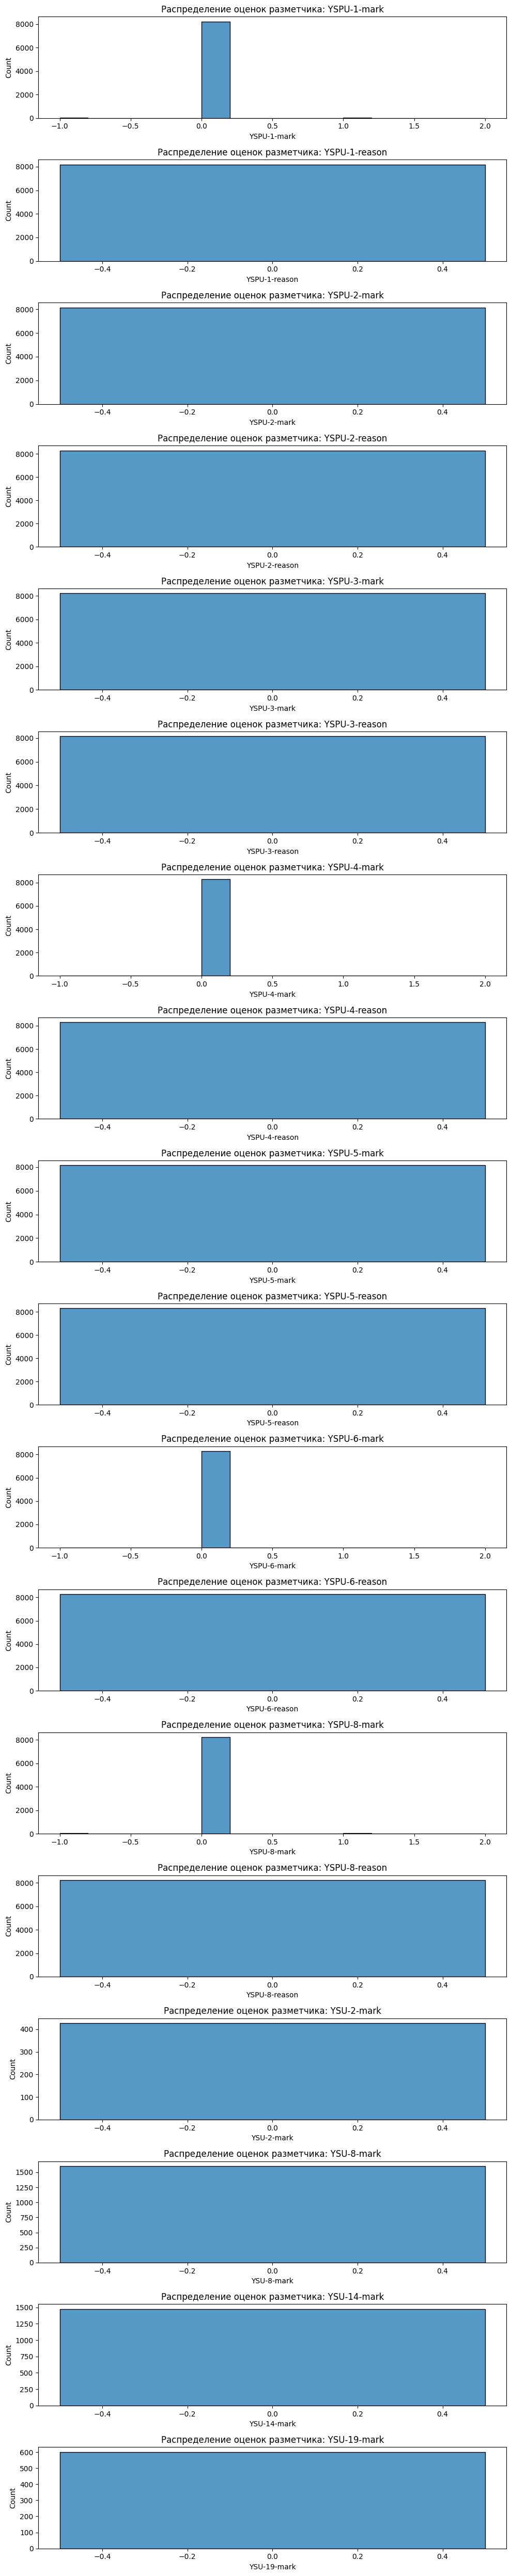

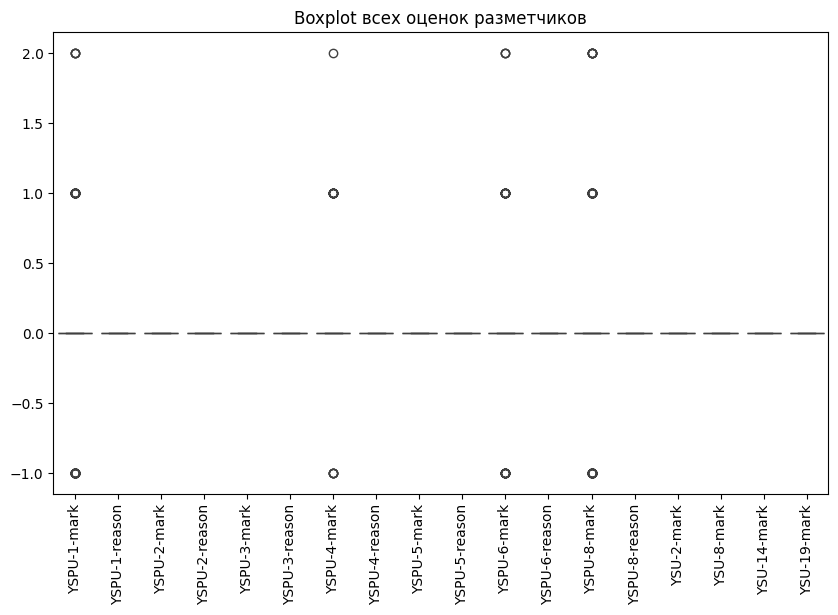

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Подготовка данных
# Убедимся, что data_clean содержит только числовые столбцы для визуализации
numerical_data = data_clean.select_dtypes(include=[np.number])

# Гистограммы распределения оценок
fig, axs = plt.subplots(nrows=len(numerical_data.columns), ncols=1, figsize=(10, 50))
for i, col in enumerate(numerical_data.columns):
    sns.histplot(numerical_data[col].dropna(), kde=False, ax=axs[i])
    axs[i].set_title(f'Распределение оценок разметчика: {col}')
plt.tight_layout()
plt.show()

# Коробчатые диаграммы (boxplots)
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=numerical_data)
ax.set_title('Boxplot всех оценок разметчиков')
plt.xticks(rotation=90)
plt.show()


Преобладание Нейтральных Оценок: Для большинства разметчиков наблюдается преобладание нейтральных оценок (0). Это указывает на то, что разметчики чаще всего не выражают ярко выраженную позитивную или негативную реакцию.

Наличие Положительных и Отрицательных Оценок: Для некоторых разметчиков также присутствуют положительные (1) и отрицательные (-1) оценки, хотя их значительно меньше по сравнению с нейтральными. Это может отражать конкретные ситуации в тексте, вызывающие у разметчиков эмоциональную реакцию.

Различия в Распределении: Отдельные разметчики (например, те, у кого в столбце присутствуют значения 2) имеют отличия в распределении оценок, что может свидетельствовать о разной интерпретации критериев оценки или об отличиях в восприятии контекста.

Смешанные Оценки: Наличие оценок со значением 2 (смешанные чувства) у некоторых разметчиков говорит о том, что они встречали ситуации в тексте, которые не позволяли им дать однозначную оценку

Центральная Тенденция: Большинство медиан оценок (линии внутри коробок) находится на уровне нуля, что подтверждает выводы, сделанные на основе гистограмм, о том, что большинство оценок нейтральны.

Вариативность Оценок: На графике отсутствуют "усы" у коробок, что указывает на отсутствие значимого разброса оценок. Это может свидетельствовать о том, что разметчики редко отходят от нейтральной оценки.

Выбросы: Наличие отдельных точек за пределами коробок указывает на наличие выбросов — необычных оценок, которые значительно отклоняются от большинства. Наличие этих выбросов может говорить о том, что в определенных случаях разметчики давали оценки с сильно выраженной положительной или отрицательной эмоциональной окраской.

Симметричность Распределения: То, что коробки и медианы выглядят симметрично относительно нулевой линии, показывает, что нет систематической предвзятости в сторону положительных или отрицательных оценок.

### Проверка гипотез

##### 1. Проверка на несамостоятельную разметку

In [44]:
from scipy.stats import chi2_contingency
from itertools import combinations

# Проверка на несамостоятельную разметку
# Мы будем считать пары разметчиков и использовать Хи-квадрат для каждой пары
for col1, col2 in combinations(yspu_columns, 2):
    contingency_table = pd.crosstab(data_clean[col1], data_clean[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    if p < 0.1:
        print(f"Подозрительная согласованность между {col1} и {col2} (p={p})")

Подозрительная согласованность между YSPU-6-mark и YSPU-8-mark (p=0.08636776979357896)


На уровне Альфа (0.05) критерий Хи-квадрат не выявил статистически значимую согласованность отметок.Другими словами, значение p для каждой проверенной пары было выше установленного порога (0.05), что не позволяет отвергнуть нулевую гипотезу о независимости оценок в парах разметчиков.

C другой стороны, если мы установим порог равный 0.1, то мы видим, что между  YSPU-6 и YSPU-8 существует некоторая вероятность согдасовааности между их оценками.

Хотя связь не является сильной (как если бы p было значительно меньше 0.05), это может быть сигналом к тому, что стоит более внимательно исследовать методы работы этих двух разметчиков, чтобы убедиться, что они действительно работают независимо.

##### 2. Определение согласованности оценок

Для проверки согласованности оценок можно применить статистику Каппы Коэна
https://coderlessons.com/tutorials/bolshie-dannye-i-analitika/uznat-statistiku/statistika-koeffitsient-kappa-koena

In [49]:

from sklearn.metrics import cohen_kappa_score



# Сортировка пар разметчиков по коэффициенту Каппа
kappa_scores = []
for col1, col2 in combinations(yspu_columns, 2):
    # Исключение строк с пропущенными значениями
    valid_indices = data_clean[col1].notna() & data_clean[col2].notna()
    score = cohen_kappa_score(data_clean[col1][valid_indices], data_clean[col2][valid_indices])
    kappa_scores.append((col1, col2, score))

# Сортировка пар разметчиков по коэффициенту Каппа
kappa_scores_sorted = sorted(kappa_scores, key=lambda x: x[2], reverse=False)

for score in kappa_scores_sorted:
    print(f"Каппа Коэна между {score[0]} и {score[1]}: {score[2]}")


Каппа Коэна между YSPU-1-mark и YSPU-1-reason: nan
Каппа Коэна между YSPU-1-mark и YSPU-8-mark: -0.006210821370933539
Каппа Коэна между YSPU-1-mark и YSPU-6-mark: -0.003946076625201078
Каппа Коэна между YSPU-1-mark и YSPU-4-mark: -0.0027660521547847594
Каппа Коэна между YSPU-1-mark и YSPU-2-mark: 0.0
Каппа Коэна между YSPU-1-mark и YSPU-2-reason: 0.0
Каппа Коэна между YSPU-1-mark и YSPU-3-mark: 0.0
Каппа Коэна между YSPU-1-mark и YSPU-3-reason: 0.0
Каппа Коэна между YSPU-1-mark и YSPU-4-reason: 0.0
Каппа Коэна между YSPU-1-mark и YSPU-5-mark: 0.0
Каппа Коэна между YSPU-1-mark и YSPU-5-reason: 0.0
Каппа Коэна между YSPU-1-mark и YSPU-6-reason: 0.0
Каппа Коэна между YSPU-1-mark и YSPU-8-reason: 0.0
Каппа Коэна между YSPU-1-reason и YSPU-2-mark: nan
Каппа Коэна между YSPU-1-reason и YSPU-2-reason: nan
Каппа Коэна между YSPU-1-reason и YSPU-3-mark: nan
Каппа Коэна между YSPU-1-reason и YSPU-3-reason: nan
Каппа Коэна между YSPU-1-reason и YSPU-4-mark: 0.0
Каппа Коэна между YSPU-1-reason и Y

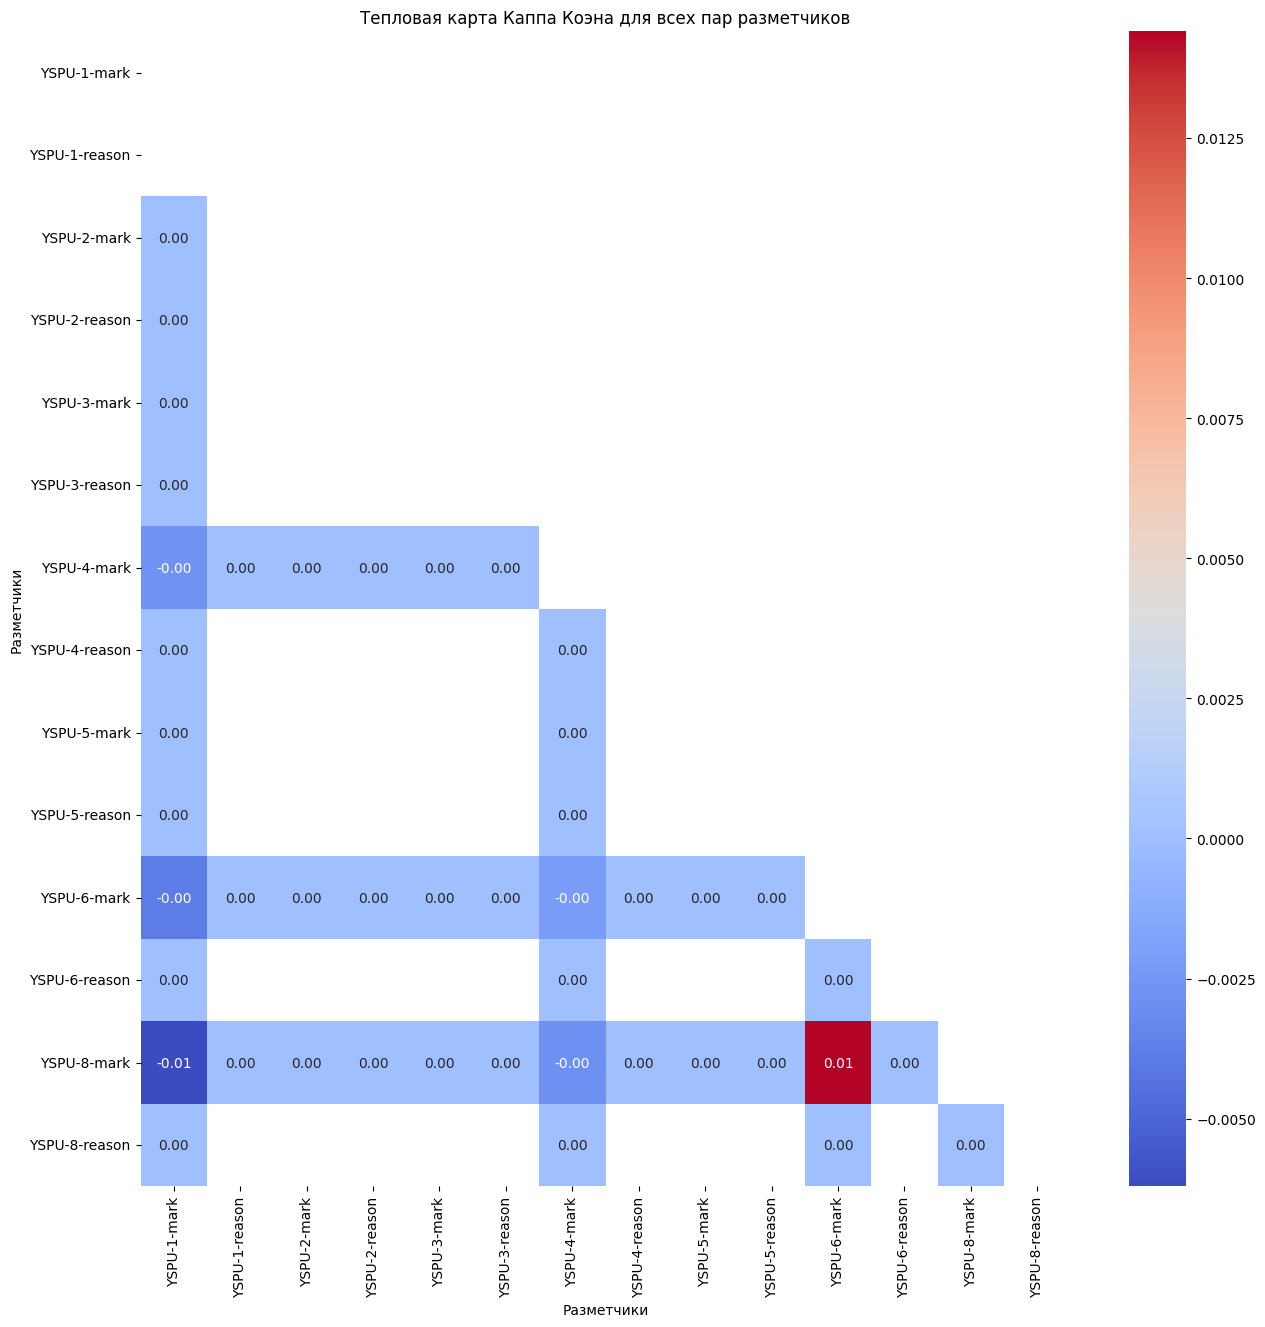

In [62]:
num_raters = len(yspu_columns)
kappa_matrix = np.full((num_raters, num_raters), np.nan)
mark_columns = data_clean[yspu_columns].columns
# Заполним матрицу согласованности значениями Каппа Коэна
for score in kappa_scores:
    i = mark_columns.tolist().index(score[0])
    j = mark_columns.tolist().index(score[1])
    kappa_matrix[i, j] = score[2]
    kappa_matrix[j, i] = score[2]  # Каппа Коэна симметрична

# Визуализируем матрицу согласованности в виде тепловой карты
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(kappa_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            xticklabels=mark_columns, yticklabels=mark_columns,
            mask=np.triu(np.ones_like(kappa_matrix, dtype=bool)))
plt.title('Тепловая карта Каппа Коэна для всех пар разметчиков')
plt.xlabel('Разметчики')
plt.ylabel('Разметчики')
plt.show()

Выводы по статистике Каппа Коэна:

Значения nan: Это происходит, когда в данных нет достаточного количества разнообразных ответов, чтобы рассчитать статистику, или когда один или оба разметчика не дали никаких оценок. В вашем случае это может быть связано с тем, что некоторые разметчики могли дать только нейтральные оценки (0), без положительных (+) или отрицательных (-), что делает расчёт Каппа Коэна невозможным.

Отрицательные значения: Каппа Коэна между -0.0062 и -0.0028 указывают на слабое отрицательное согласие, что может быть случайным. Это говорит о том, что согласованность оценок между этими парами разметчиков отсутствует или даже немного обратная по отношению к согласованности.

Значения 0.0: Это говорит о том, что не было обнаружено согласованности между оценками разметчиков. Ваши данные не показывают никакой согласованности между этими парами разметчиков.

Положительные значения: Единственное положительное значение Каппа Коэна 0.0144 между YSPU-6-mark и YSPU-8-mark показывает очень небольшую степень согласованности между оценками этих двух разметчиков. Это значение близко к нулю, что говорит о том, что любая согласованность, скорее всего, является случайной и не является статистически значимой.

##### 3. Проверка гипотезы о существовании критериев согласованности

Начнем с кластеризации, чтобы увидеть, существуют ли различимые группы согласованности в оценках разметчиков. Вот пример кода, который вы можете использовать для выполнения кластеризации (используя метод K-Means) и последующего анализа главных компонент (PCA) для визуализации результатов

Подберем оптимальное количество кластеров

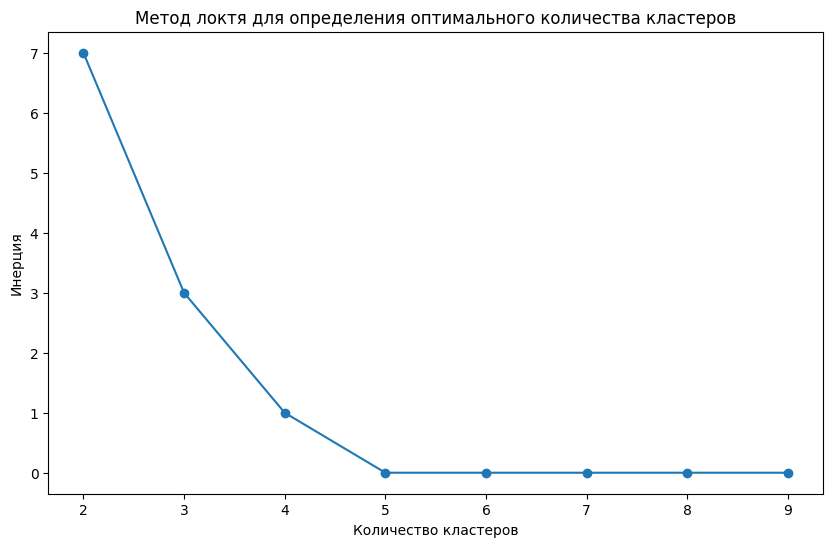

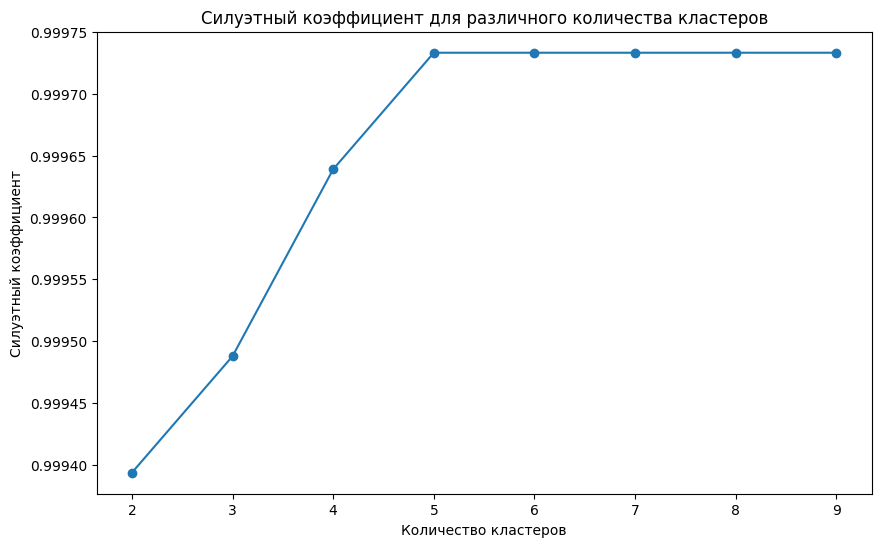

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


data_for_clustering = data_clean[yspu_columns].dropna()

# Используем метод локтя для определения оптимального количества кластеров
inertia = []
silhouette_scores = []
k_values = range(2, 10)  # Определяем диапазон для количества кластеров

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_clustering)
    inertia.append(kmeans.inertia_)
    # Также рассчитаем силуэтный коэффициент для каждого k
    silhouette_scores.append(silhouette_score(data_for_clustering, kmeans.labels_))

# Визуализация метода локтя
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Метод локтя для определения оптимального количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Инерция')
plt.xticks(k_values)
plt.show()

# Визуализация силуэтных коэффициентов
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Силуэтный коэффициент для различного количества кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэтный коэффициент')
plt.xticks(k_values)
plt.show()



Судя по графикам, можно выбрать 4 кластера. График силуэтного коэффициента показывает, что значение этого коэффициента продолжает увеличиваться с ростом количества кластеров и стабилизируется после 4 кластеров. Обычно лучшим выбором считается количество кластеров, при котором силуэтный коэффициент достигает пика, что указывает на наилучшее разделение объектов по кластерам.

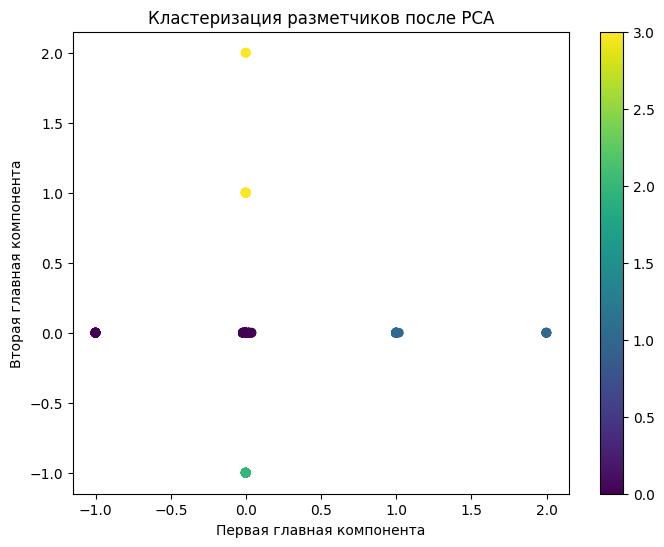

In [60]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Заполнение пропущенных значений нулями
data_clean_filled = data_clean[yspu_columns].fillna(0)

# Повторное применение PCA и K-Means
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_clean_filled)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(data_clean_filled)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Кластеризация разметчиков после PCA')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.colorbar()
plt.show()



Выводы, которые можно сделать:

Четкое Разделение: Наличие четырех различимых кластеров может указывать на то, что существуют четыре группы разметчиков с различными подходами к задаче.

Согласованность в Оценках: Разметчики внутри каждого кластера, вероятно, демонстрируют схожие паттерны в оценке тональности текстов, что может быть следствием общих критериев оценки или схожего понимания задания.

Влияние Компонент: Разделение на кластеры в двумерном пространстве PCA показывает, какие две основные компоненты вносят наибольший вклад в различие между группами разметчиков. Эти компоненты представляют собой линейные комбинации исходных переменных (оценок), и дальнейший анализ может помочь понять, какие именно аспекты разметки важны для каждого кластера.

### Вывод

Несамостоятельная Разметка: Не было найдено явных доказательств несамостоятельной разметки, основанных на статистическом анализе с использованием Хи-квадрат теста. Это говорит о том, что разметчики, скорее всего, работали независимо друг от друга.

Согласованность Оценок: Методы анализа, такие как Каппа Коэна, не выявили высокого уровня согласованности между оценками разметчиков. Это может указывать на то, что разметчики использовали разные критерии или интерпретировали задание по-разному.

Критерии Согласованности: Анализ с использованием PCA и кластеризации K-Means с оптимальным числом кластеров, определенным через метод локтя и силуэтный анализ, показал наличие четырех групп. Эти группы могут отражать различные подходы к разметке текстов.

Оптимальное Количество Кластеров: Совокупность метода локтя и силуэтного анализа предполагает, что оптимальное количество кластеров для разметчиков равно четырем. Это число кластеров обеспечивает наилучшее разделение между схожими паттернами разметки и может использоваться для более детального изучения специфических подходов разметчиков.

Рекомендации: Для дальнейшего улучшения процесса разметки можно рассмотреть возможность стандартизации критериев разметки и проведения обучающих семинаров для разметчиков. Это может помочь повысить согласованность в разметке и улучшить качество данных.